# EDA

In [1]:
import os
import cv2
import hashlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm


In [10]:
DATASET_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset"


## 1️⃣ How many classes are present?

In [11]:
classes = [d for d in os.listdir(DATASET_DIR)
           if os.path.isdir(os.path.join(DATASET_DIR, d))]

print("Number of classes:", len(classes))
print(classes)


Number of classes: 10
['Apple___healthy', 'Corn_(maize)___Common_rust_', 'Grape___Black_rot', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Potato___Early_blight', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Tomato___Late_blight', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


## 2️⃣ How many images per class?

In [12]:
class_counts = {}

for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    images = [f for f in os.listdir(cls_path)
              if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    class_counts[cls] = len(images)

df_counts = pd.DataFrame.from_dict(class_counts, orient="index", columns=["image_count"])
df_counts.sort_values("image_count", ascending=False)


,image_count
Orange___Haunglongbing_(Citrus_greening),5507
Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357
Soybean___healthy,5090
Peach___Bacterial_spot,2297
Tomato___Late_blight,1909
Squash___Powdery_mildew,1835
Apple___healthy,1645
Corn_(maize)___Common_rust_,1192
Grape___Black_rot,1180
Potato___Early_blight,1000


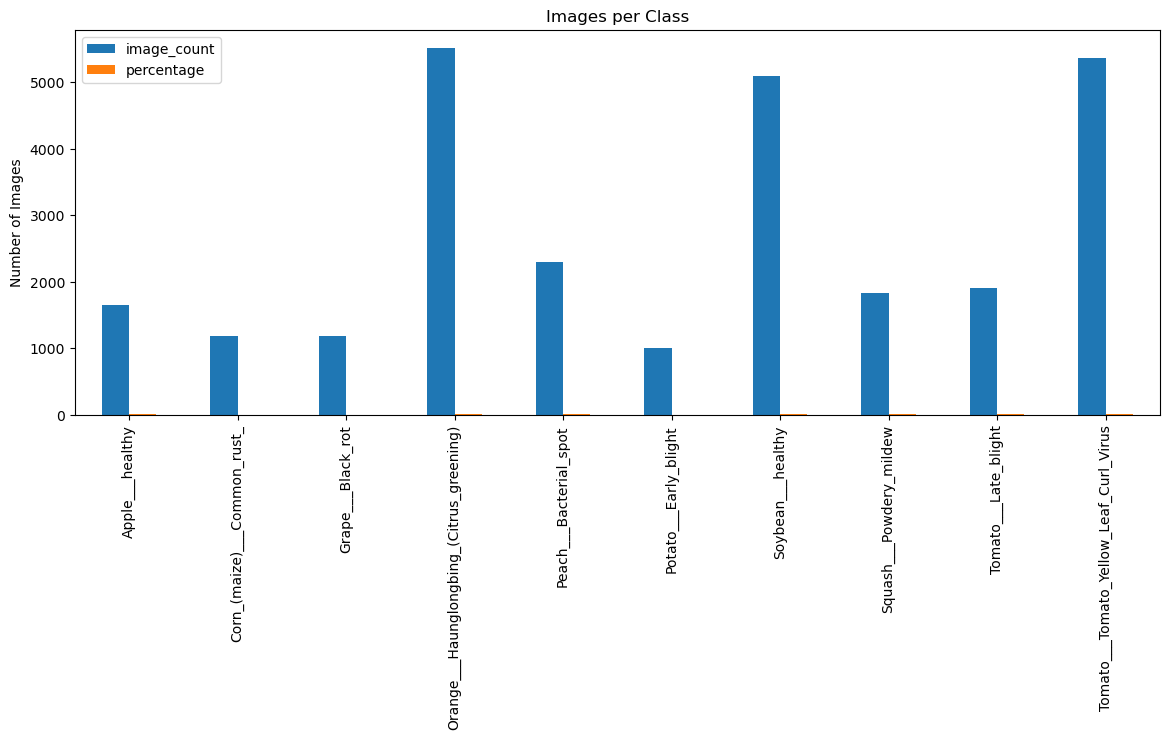

In [19]:
df_counts.plot(kind="bar", figsize=(14,5))
plt.ylabel("Number of Images")
plt.title("Images per Class")
plt.show()


## 3️⃣ Total dataset size

In [13]:
total_images = sum(class_counts.values())
print("Total number of images:", total_images)


Total number of images: 27012


## 4️⃣ Class imbalance analysis (% per class)

In [14]:
df_counts["percentage"] = (df_counts["image_count"] / total_images) * 100
df_counts.sort_values("percentage", ascending=False)


,image_count,percentage
Orange___Haunglongbing_(Citrus_greening),5507,20.387235
Tomato___Tomato_Yellow_Leaf_Curl_Virus,5357,19.831927
Soybean___healthy,5090,18.843477
Peach___Bacterial_spot,2297,8.503628
Tomato___Late_blight,1909,7.067229
Squash___Powdery_mildew,1835,6.793277
Apple___healthy,1645,6.089886
Corn_(maize)___Common_rust_,1192,4.412854
Grape___Black_rot,1180,4.368429
Potato___Early_blight,1000,3.702058


## 5️⃣ Image resolution analysis

In [15]:
widths, heights = [], []

for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    for img_name in os.listdir(cls_path):
        if img_name.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(cls_path, img_name)
            img = cv2.imread(img_path)
            if img is not None:
                h, w, _ = img.shape
                widths.append(w)
                heights.append(h)

print("Min width:", min(widths), "Max width:", max(widths), "Avg width:", int(np.mean(widths)))
print("Min height:", min(heights), "Max height:", max(heights), "Avg height:", int(np.mean(heights)))


Min width: 256 Max width: 256 Avg width: 256
Min height: 256 Max height: 256 Avg height: 256


## 6️⃣ Corrupted / unreadable images

In [17]:
corrupted = []

for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        try:
            img = cv2.imread(img_path)
            if img is None:
                corrupted.append(img_path)
        except:
            corrupted.append(img_path)

print("Number of corrupted images:", len(corrupted))


Number of corrupted images: 0


## 7️⃣ RGB color distribution

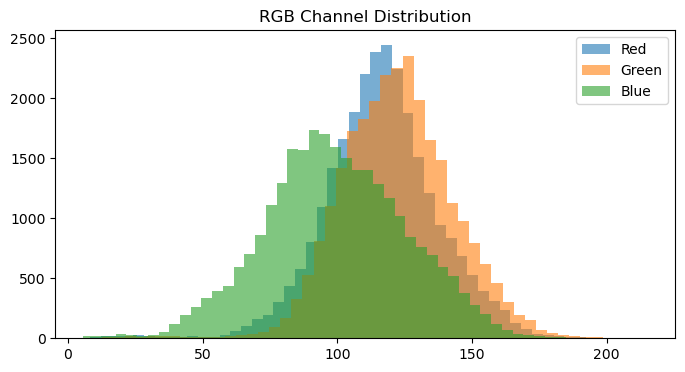

In [18]:
r, g, b = [], [], []

for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            b_channel, g_channel, r_channel = cv2.split(img)
            r.append(np.mean(r_channel))
            g.append(np.mean(g_channel))
            b.append(np.mean(b_channel))

plt.figure(figsize=(8,4))
plt.hist(r, bins=50, alpha=0.6, label='Red')
plt.hist(g, bins=50, alpha=0.6, label='Green')
plt.hist(b, bins=50, alpha=0.6, label='Blue')
plt.legend()
plt.title("RGB Channel Distribution")
plt.show()


## 8️⃣ Duplicate image detection (MD5 hash)

In [20]:
hashes = {}
duplicates = []

for cls in classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()

        if file_hash in hashes:
            duplicates.append(img_path)
        else:
            hashes[file_hash] = img_path

print("Duplicate images found:", len(duplicates))


Duplicate images found: 15


## 9️⃣ Healthy vs Diseased distribution

Healthy images: 6735
Diseased images: 20277


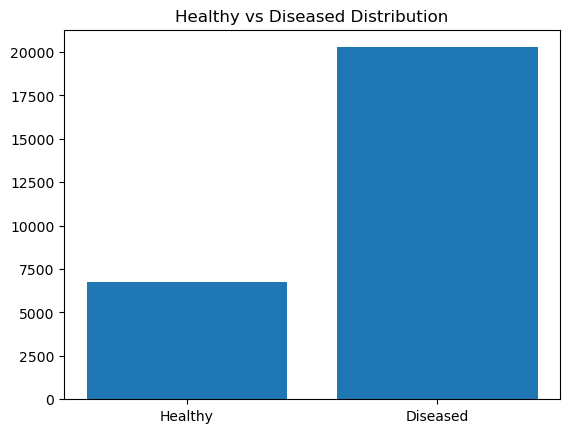

In [21]:
healthy_count = 0
diseased_count = 0

for cls, count in class_counts.items():
    if "healthy" in cls.lower():
        healthy_count += count
    else:
        diseased_count += count

print("Healthy images:", healthy_count)
print("Diseased images:", diseased_count)

plt.bar(["Healthy", "Diseased"], [healthy_count, diseased_count])
plt.title("Healthy vs Diseased Distribution")
plt.show()


## 🔟 Dataset suitability (visual inspection)

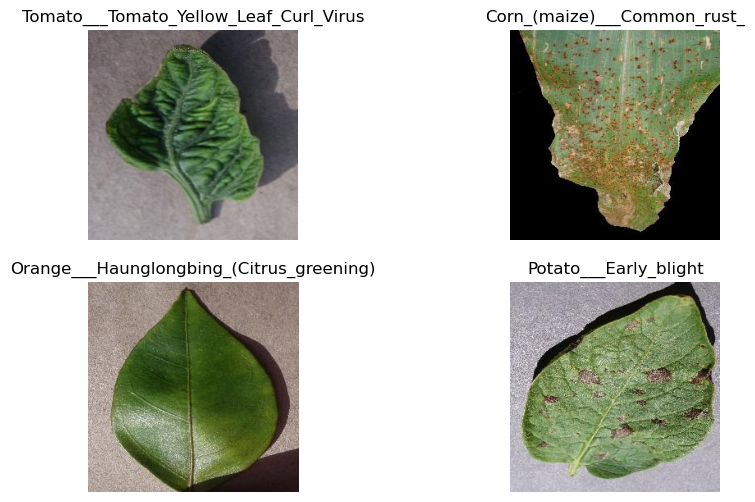

In [22]:
import random
import matplotlib.pyplot as plt

sample_classes = random.sample(classes, 4)

plt.figure(figsize=(10,6))
i = 1
for cls in sample_classes:
    cls_path = os.path.join(DATASET_DIR, cls)
    img_name = random.choice(os.listdir(cls_path))
    img = cv2.imread(os.path.join(cls_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2,2,i)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    i += 1

plt.show()


# Data Cleaning

## Remove duplicates (MD5-based)

In [23]:
import os
import hashlib

DATASET_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset"

hashes = {}
removed = 0

for root, _, files in os.walk(DATASET_DIR):
    for file in files:
        if not file.lower().endswith(('.jpg', '.png', '.jpeg')):
            continue

        path = os.path.join(root, file)
        with open(path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()

        if file_hash in hashes:
            os.remove(path)
            removed += 1
        else:
            hashes[file_hash] = path

print(f"✅ Removed {removed} duplicate images")


✅ Removed 15 duplicate images


## Balancing Dataset

In [1]:
import os
import random
import shutil

# Paths
SOURCE_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset"
BALANCED_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset_balanced"

os.makedirs(BALANCED_DIR, exist_ok=True)

# Read all class folders
classes = [
    d for d in os.listdir(SOURCE_DIR)
    if os.path.isdir(os.path.join(SOURCE_DIR, d))
]

# Count images per class
class_counts = {}
for cls in classes:
    img_dir = os.path.join(SOURCE_DIR, cls)
    images = [f for f in os.listdir(img_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    class_counts[cls] = len(images)

# Find minimum count
min_count = min(class_counts.values())
#min_count = 500
print("Balancing all classes to:", min_count)

random.seed(42)  # reproducibility

# Balance each class
for cls in classes:
    src_cls_dir = os.path.join(SOURCE_DIR, cls)
    dst_cls_dir = os.path.join(BALANCED_DIR, cls)
    os.makedirs(dst_cls_dir, exist_ok=True)

    images = [f for f in os.listdir(src_cls_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    selected_images = random.sample(images, min_count)

    for img in selected_images:
        shutil.copy(
            os.path.join(src_cls_dir, img),
            os.path.join(dst_cls_dir, img)
        )

print("✅ Dataset balanced successfully.")


Balancing all classes to: 500
✅ Dataset balanced successfully.


# Train Test Split

In [2]:
import os
import random
import shutil

# Paths
BALANCED_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset_balanced"
YOLO_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset_yolo"

TRAIN_RATIO = 0.7
VAL_RATIO = 0.2
TEST_RATIO = 0.1

random.seed(42)

# Create split directories
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(YOLO_DIR, split), exist_ok=True)

# Process each class
classes = os.listdir(BALANCED_DIR)

for cls in classes:
    cls_path = os.path.join(BALANCED_DIR, cls)
    images = [f for f in os.listdir(cls_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    random.shuffle(images)

    total = len(images)
    train_end = int(total * TRAIN_RATIO)
    val_end = train_end + int(total * VAL_RATIO)

    splits = {
        "train": images[:train_end],
        "val": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split, split_images in splits.items():
        split_cls_dir = os.path.join(YOLO_DIR, split, cls)
        os.makedirs(split_cls_dir, exist_ok=True)

        for img in split_images:
            shutil.copy(
                os.path.join(cls_path, img),
                os.path.join(split_cls_dir, img)
            )

    print(f"{cls}: train={len(splits['train'])}, val={len(splits['val'])}, test={len(splits['test'])}")

print("\n✅ Train/Val/Test split completed successfully.")


Apple___healthy: train=350, val=100, test=50
Corn_(maize)___Common_rust_: train=350, val=100, test=50
Grape___Black_rot: train=350, val=100, test=50
Orange___Haunglongbing_(Citrus_greening): train=350, val=100, test=50
Peach___Bacterial_spot: train=350, val=100, test=50
Potato___Early_blight: train=350, val=100, test=50
Soybean___healthy: train=350, val=100, test=50
Squash___Powdery_mildew: train=350, val=100, test=50
Tomato___Late_blight: train=350, val=100, test=50
Tomato___Tomato_Yellow_Leaf_Curl_Virus: train=350, val=100, test=50

✅ Train/Val/Test split completed successfully.


# Training - Classification

In [ ]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r yolov5/requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
#!pip install torch

In [4]:
import sys
!"{sys.executable}" -m pip install ultralytics

  Using cached ultralytics-8.4.8-py3-none-any.whl.metadata (38 kB)
  Using cached opencv_python-4.13.0.90-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached torch-2.9.1-cp312-cp312-win_amd64.whl.metadata (30 kB)
  Using cached torchvision-0.25.0-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached polars-1.37.1-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.24.1-cp312-cp312-win_amd64.whl.metadata (5.9 kB)
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------------------------- ---- 1.0/1.2 M

  You can safely remove it manually.


In [6]:
!pip uninstall torch torchvision torchaudio -y

Found existing installation: torch 2.9.1
Uninstalling torch-2.9.1:
  Successfully uninstalled torch-2.9.1
Found existing installation: torchvision 0.24.1
Uninstalling torchvision-0.24.1:
  Successfully uninstalled torchvision-0.24.1


In [7]:
import sys
!"{sys.executable}" -m pip uninstall torch torchvision torchaudio -y

In [2]:
import torch
import ultralytics

# Check if CUDA (GPU support) is active
gpu_ready = torch.cuda.is_available()
print(f"--- GPU Check ---")
print(f"PyTorch Version: {torch.__version__}")
print(f"Is GPU Available? {gpu_ready}")
if gpu_ready:
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("WARNING: Using CPU. Training will be extremely slow.")

--- GPU Check ---
PyTorch Version: 2.7.1+cu118
Is GPU Available? True
GPU Name: NVIDIA GeForce MX450


In [3]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [2]:
#!pip uninstall opencv-python -y
!pip install opencv-python==4.9.0.80


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.6 MB 6.3 MB/s eta 0:00:06
   - -------------------------------------- 1.8/38.6 MB 4.8 MB/s eta 0:00:08
   -- ------------------------------------- 2.9/38.6 MB 4.4 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/38.6 MB 4.3 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/38.6 MB 4.2 MB/s eta 0:00:09
   ----- ---------------------------------- 5.2/38.6 MB 4.2 MB/s eta 0:00:08
   ------ --------------------------------- 6.0/38.6 MB 4.1 MB/s eta 0:00:08
   ------- -------------------------------- 6.8/38.6 MB 4.1 MB/s eta 0:00:08
   ------- -------------------------------- 7.6/38.6 MB 4.1 MB/s eta 0:00:08
   -------- ------------------------------- 8.1/38.6 MB 3.9 MB/s eta 0:00:08
   --------- ------------------------------ 9.2/38.6 MB 4.0 MB/s eta 0:00:08
   ---------- ----------------------------- 10.0/38.6 MB 4.0 MB/s eta 0:00:08
   --

In [4]:
#python - <<EOF
import numpy as np
import torch
import cv2
print("NumPy:", np.__version__)
print("Torch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("OpenCV:", cv2.__version__)
#EOF


NumPy: 1.26.4
Torch: 2.7.1+cu118
CUDA available: True
OpenCV: 4.9.0


In [5]:
from ultralytics import YOLO

DATA_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset_yolo"
SAVE_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\classification_results"

# Load YOLOv8 Classification model
model = YOLO("yolov8n-cls.pt")

results = model.train(
    data=DATA_DIR,     # 👈 DIRECTORY, NOT YAML
    epochs=20,
    imgsz=224,
    batch=16,
    device=0,          # MX450
    workers=2,
    amp=True,
    project=SAVE_DIR,
    name="agrivision_cls"
)

print("✅ Training completed successfully")


Ultralytics 8.4.8  Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\dataset_yolo, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=agrivision_cls6, nbs=64, nms=False, opset=None, optimize=False, 

In [1]:
import numpy as np
print(np.__version__)


1.26.4


In [ ]:
#!pip uninstall numpy

# Training - Object Detection

In [1]:
import os
import shutil
import random
from pathlib import Path

# =========================
# PATHS
# =========================
SOURCE_IMAGES = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\Dataset\images"
SOURCE_LABELS = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\Dataset\labels"

TARGET_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset"

# Split ratio
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

# File extensions
IMG_EXTS = [".jpg", ".jpeg", ".png"]
LABEL_EXT = ".txt"

# =========================
# CREATE FOLDER STRUCTURE
# =========================
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(TARGET_DIR, "images", split), exist_ok=True)
    os.makedirs(os.path.join(TARGET_DIR, "labels", split), exist_ok=True)

# =========================
# LIST ALL IMAGES
# =========================
all_images = [f for f in os.listdir(SOURCE_IMAGES) if Path(f).suffix.lower() in IMG_EXTS]
random.shuffle(all_images)

n_total = len(all_images)
n_train = int(TRAIN_RATIO * n_total)
n_val = int(VAL_RATIO * n_total)
# Remaining goes to test
n_test = n_total - n_train - n_val

train_files = all_images[:n_train]
val_files = all_images[n_train:n_train+n_val]
test_files = all_images[n_train+n_val:]

print(f"Total images: {n_total} | Train: {len(train_files)}, Val: {len(val_files)}, Test: {len(test_files)}")

# =========================
# COPY FILES
# =========================
def copy_split(file_list, split_name):
    for img_file in file_list:
        label_file = Path(img_file).with_suffix(LABEL_EXT).name

        # Copy image
        shutil.copy2(os.path.join(SOURCE_IMAGES, img_file),
                     os.path.join(TARGET_DIR, "images", split_name, img_file))
        # Copy label
        shutil.copy2(os.path.join(SOURCE_LABELS, label_file),
                     os.path.join(TARGET_DIR, "labels", split_name, label_file))

copy_split(train_files, "train")
copy_split(val_files, "val")
copy_split(test_files, "test")

print("✅ Dataset split completed!")
print(f"Folder structure at: {TARGET_DIR}")


Total images: 54293 | Train: 38005, Val: 8143, Test: 8145
✅ Dataset split completed!
Folder structure at: E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset


🔍 Checking: APHE_image (145).jpg


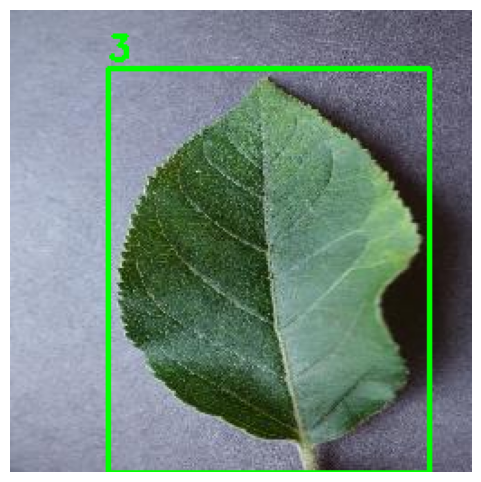

🔍 Checking: TMLB_image (1633).jpg


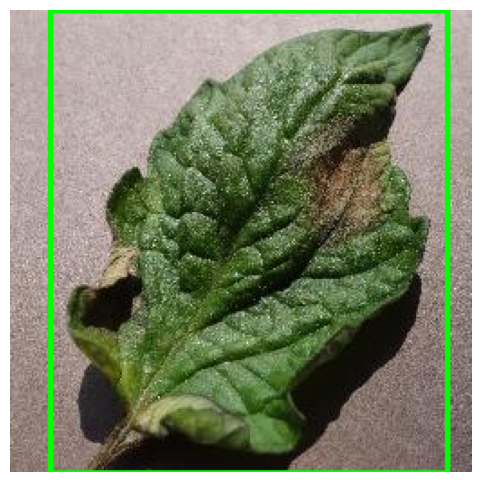

🔍 Checking: TMSL_image (1139).jpg


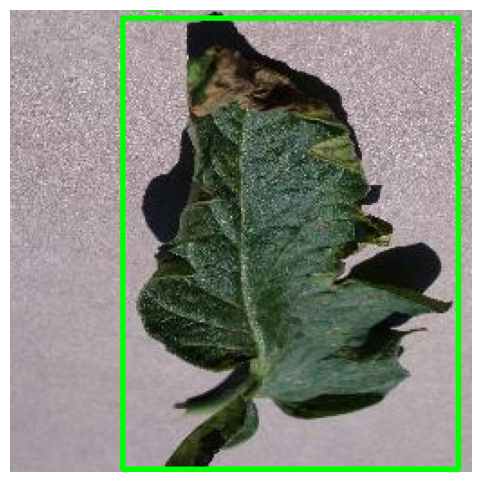

✅ Dataset sanity check passed


In [2]:
import os
import cv2
import random
import matplotlib.pyplot as plt

BASE_PATH = r"E:/Desktop/GUVI/Project/Multi-Modal Crop Diagnostic System/PlantVillage_for_object_detection/SplitDataset"
IMG_DIR = os.path.join(BASE_PATH, "images/train")
LBL_DIR = os.path.join(BASE_PATH, "labels/train")

NUM_SAMPLES = 3

images = [f for f in os.listdir(IMG_DIR) if f.endswith(('.jpg', '.png'))]
assert len(images) > 0, "❌ No images found!"

samples = random.sample(images, NUM_SAMPLES)

for img_name in samples:
    img_path = os.path.join(IMG_DIR, img_name)
    label_path = os.path.join(LBL_DIR, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

    print(f"🔍 Checking: {img_name}")

    if not os.path.exists(label_path):
        print("❌ Label missing")
        continue

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    with open(label_path) as f:
        for line in f:
            cls, x, y, bw, bh = map(float, line.split())

            assert 0 <= cls < 38
            assert 0 <= x <= 1 and 0 <= y <= 1
            assert 0 < bw <= 1 and 0 < bh <= 1

            x1 = int((x - bw/2) * w)
            y1 = int((y - bh/2) * h)
            x2 = int((x + bw/2) * w)
            y2 = int((y + bh/2) * h)

            cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
            cv2.putText(img, str(int(cls)), (x1, y1-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

print("✅ Dataset sanity check passed")


In [ ]:
from ultralytics import YOLO
import shutil
from pathlib import Path

SAVE_DIR = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\object_detection_result"

model = YOLO("yolov8n.pt")

results = model.train(
    data=r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset\data.yaml",
    epochs=20,
    imgsz=320,        # 🔽 VERY IMPORTANT
    batch=4,          # 🔽 VERY IMPORTANT
    device=0,
    workers=2,        # 🔽 avoid CPU deadlock
    amp=False,        # 🔽 avoid VRAM spikes
    mosaic=0.0,       # 🔽 disable heavy augmentation
    project=SAVE_DIR,
    name="yolo",
    save=True
)

# Rename best.pt → yolo.pt
best_model = Path(results.save_dir) / "weights" / "best.pt"
final_model = Path(SAVE_DIR) / "yolo.pt"
shutil.copy2(best_model, final_model)

print("✅ Model saved as:", final_model)


New https://pypi.org/project/ultralytics/8.4.9 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.8  Python-3.12.7 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce MX450, 2048MiB)
engine\trainer: agnostic_nms=False, amp=False, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset\data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=


image 1/1 E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset\images\test\APAS_image (25).jpg: 640x640 1 Apple___Apple_scab, 95.2ms
Speed: 4.8ms preprocess, 95.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

🟢 DETECTION RESULTS
--------------------------------------------------
Detection 1:
  Class      : Apple___Apple_scab
  Confidence : 0.989
  BBox       : [0, 0, 248, 256]
--------------------------------------------------


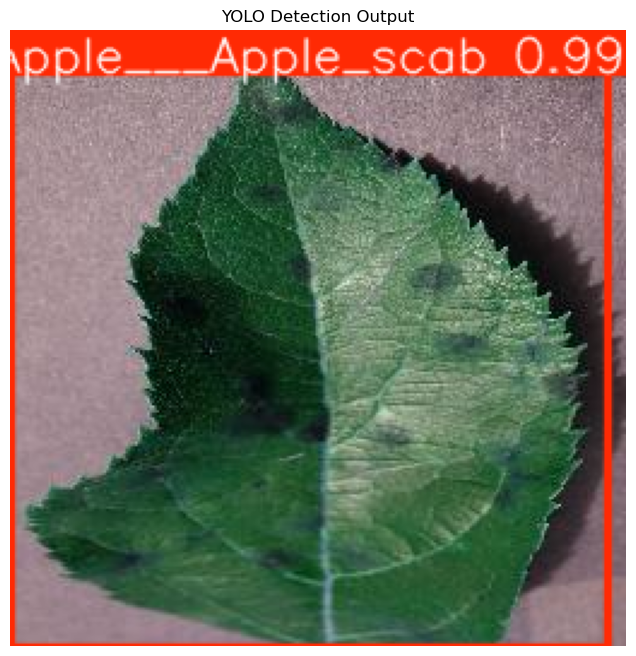

In [5]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# -----------------------------
# PATHS
# -----------------------------
MODEL_PATH = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\object_detection_result\yolo.pt"
IMAGE_PATH = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset\images\test\APAS_image (25).jpg"

# -----------------------------
# LOAD MODEL
# -----------------------------
model = YOLO(MODEL_PATH)

# -----------------------------
# RUN INFERENCE
# -----------------------------
results = model.predict(
    source=IMAGE_PATH,
    imgsz=640,
    conf=0.25,
    device="cpu"  # use 0 if GPU
)

# -----------------------------
# PRINT RESULTS
# -----------------------------
print("\n🟢 DETECTION RESULTS\n" + "-" * 50)

for r in results:
    if r.boxes is None or len(r.boxes) == 0:
        print("❌ No objects detected")
        continue

    for i, box in enumerate(r.boxes, 1):
        cls_id = int(box.cls)
        cls_name = model.names[cls_id]
        conf = float(box.conf)
        x1, y1, x2, y2 = box.xyxy[0].tolist()

        print(f"Detection {i}:")
        print(f"  Class      : {cls_name}")
        print(f"  Confidence : {conf:.3f}")
        print(f"  BBox       : [{int(x1)}, {int(y1)}, {int(x2)}, {int(y2)}]")
        print("-" * 50)

# -----------------------------
# DISPLAY IMAGE WITH BOXES
# -----------------------------
annotated_img = results[0].plot()  # numpy array with boxes drawn

plt.figure(figsize=(8, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("YOLO Detection Output")
plt.show()


# Transformers

In [4]:
#!pip install ollama

In [3]:
#!pip install openai

In [2]:
!pip install -q transformers torch sentencepiece


In [1]:
from transformers import pipeline

pipe = pipeline(
    "text-generation",
    model="google/flan-t5-base",
    device=-1   # CPU (safe)
)

output = pipe(
    "Explain crop disease detection in one sentence.",
    max_new_tokens=50
)

print(output[0]["generated_text"])


Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['PeftModelForCausalLM', 'AfmoeForCausalLM', 'ApertusForCausalLM', 'ArceeForCausalLM', 'AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BitNetForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'BltForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'CwmForCausalLM', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV2ForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLl

Explain crop disease detection in one sentence. types indicate pest diseases early warning patterns; these results correspond over six states: Iowa. There occurs three groups where outbreak or direct warning cannot occur simultaneously including multiple subpouscrine conditions: disease (heptoph


In [1]:
from transformers import pipeline
import torch

pipe = pipeline(
    "text-generation",
    model="google/gemma-2b-it",
    device="auto",
    torch_dtype=torch.float16
)

out = pipe(
    "You are an agriculture expert. Explain leaf blight in simple terms.",
    max_new_tokens=80
)

print(out[0]["generated_text"])


`torch_dtype` is deprecated! Use `dtype` instead!


Loading weights:   0%|          | 0/164 [00:00<?, ?it/s]

Passing `generation_config` together with generation-related arguments=({'max_new_tokens'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=80) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


You are an agriculture expert. Explain leaf blight in simple terms.

Sure, here's a simplified explanation of leaf blight:

Leaf blight is a plant disease caused by fungi or bacteria that attack the leaves and stems of plants. These infections can cause different symptoms, such as yellowing, browning, or curling of the leaves, premature leaf drop, and reduced plant growth.

Leaf blight can affect many different plants, including vegetables, fruits, and ornamental plants


🔵 Loading LLM...


`torch_dtype` is deprecated! Use `dtype` instead!


Loading weights:   0%|          | 0/164 [00:00<?, ?it/s]

🟢 Loading YOLO model...
🟡 Running disease detection...

image 1/1 E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset\images\test\APAS_image (25).jpg: 640x640 1 Apple___Apple_scab, 238.3ms
Speed: 83.6ms preprocess, 238.3ms inference, 82.5ms postprocess per image at shape (1, 3, 640, 640)


Passing `generation_config` together with generation-related arguments=({'max_new_tokens', 'temperature'}) is deprecated and will be removed in future versions. Please pass either a `generation_config` object OR all generation parameters explicitly, but not both.
Both `max_new_tokens` (=200) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


🧠 Generating diagnostic report...

📋 AI DIAGNOSTIC REPORT
------------------------------------------------------------

You are an agriculture expert.

A crop image was analyzed using a computer vision model.
The following diseases were detected:

- Apple___Apple_scab detected with 98.89% confidence

Tasks:
1. Explain the disease(s) in simple farmer-friendly language.
2. Mention possible causes.
3. Suggest immediate preventive or corrective actions.
4. If confidence is below 60%, mention uncertainty politely.

Keep the response concise and practical.
**Answer:**

**1. Apple Scab**

Apple scab is a fungal disease that affects apples, pears, and peaches. It causes small, irregular brown spots on the leaves, stems, and fruits. Scab can cause significant economic losses in orchards due to reduced fruit quality and yield.

**2. Possible Causes**

- Poor sanitation: Lack of proper cleaning and maintenance of equipment and tools can allow fungal spores to spread.
- Environmental conditions: H

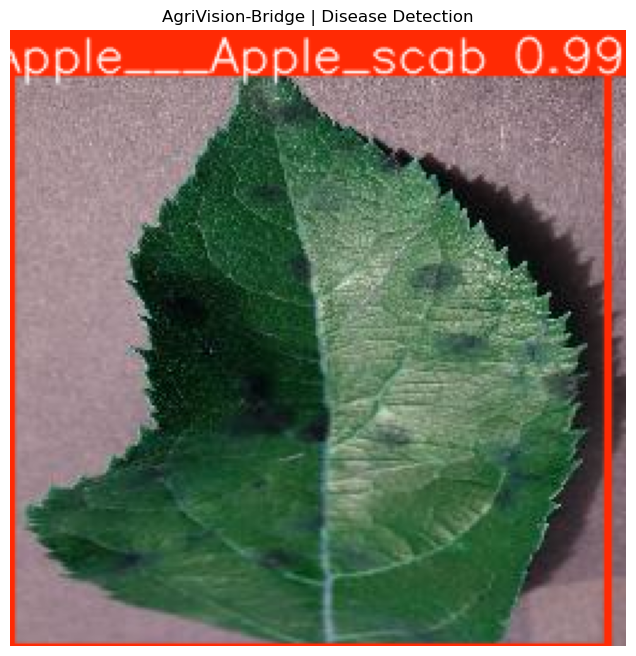

In [1]:
# =============================
# IMPORTS
# =============================
from transformers import pipeline
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt

# =============================
# CONFIG
# =============================
YOLO_MODEL_PATH = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\object_detection_result\yolo.pt"
IMAGE_PATH = r"E:\Desktop\GUVI\Project\Multi-Modal Crop Diagnostic System\PlantVillage_for_object_detection\SplitDataset\images\test\APAS_image (25).jpg"

USE_GPU_LLM = True   # set False if CUDA OOM
YOLO_DEVICE = 0  # change to 0 if YOLO on GPU

# =============================
# LOAD LLM (Reasoning Layer)
# =============================
print("🔵 Loading LLM...")

llm_pipe = pipeline(
    "text-generation",
    model="google/gemma-2b-it",
    device=0 if USE_GPU_LLM else -1,
    torch_dtype=torch.float16 if USE_GPU_LLM else None
)

# =============================
# LOAD YOLO (Vision Layer)
# =============================
print("🟢 Loading YOLO model...")
yolo_model = YOLO(YOLO_MODEL_PATH)

# =============================
# RUN YOLO INFERENCE
# =============================
print("🟡 Running disease detection...")

results = yolo_model.predict(
    source=IMAGE_PATH,
    imgsz=640,
    conf=0.25,
    device=YOLO_DEVICE
)

detections = []

for r in results:
    if r.boxes is None:
        continue

    for box in r.boxes:
        cls_id = int(box.cls)
        cls_name = yolo_model.names[cls_id]
        confidence = float(box.conf)

        detections.append({
            "disease": cls_name,
            "confidence": round(confidence * 100, 2)
        })

# =============================
# HANDLE NO DETECTION
# =============================
if not detections:
    print("❌ No disease detected")
    exit()

# =============================
# BUILD STRUCTURED PROMPT
# =============================
detection_text = "\n".join(
    [f"- {d['disease']} detected with {d['confidence']}% confidence"
     for d in detections]
)

prompt = f"""
You are an agriculture expert.

A crop image was analyzed using a computer vision model.
The following diseases were detected:

{detection_text}

Tasks:
1. Explain the disease(s) in simple farmer-friendly language.
2. Mention possible causes.
3. Suggest immediate preventive or corrective actions.
4. If confidence is below 60%, mention uncertainty politely.

Keep the response concise and practical.
"""

# =============================
# RUN LLM REASONING
# =============================
print("🧠 Generating diagnostic report...\n")

llm_output = llm_pipe(
    prompt,
    max_new_tokens=200,
    temperature=0.4
)

report = llm_output[0]["generated_text"]

print("📋 AI DIAGNOSTIC REPORT")
print("-" * 60)
print(report)

# =============================
# VISUALIZE YOLO OUTPUT
# =============================
annotated_img = results[0].plot()

plt.figure(figsize=(8, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("AgriVision-Bridge | Disease Detection")
plt.show()


# Streamlit Cloud

AgriVision-Bridge/
│
├── app.py                     # Home page
├── pages/
│   ├── object_detection.py    # YOLO + LLM inference
│   └── model_performance.py   # Metrics, plots, CSV
│
├── helper.py
├── llm_helper.py              # NEW (Transformers loader)
├── settings.py
├── requirements.txt
│
├── results.csv
├── confusion_matrix.png
├── results.png
│
└── weights/
    └── yolo.pt                # ✅ REQUIRED (your trained model)


## app.py

In [ ]:
import streamlit as st

# --------------------------------------------------
# PAGE CONFIG
# --------------------------------------------------
st.set_page_config(
    page_title="AgriVision-Bridge",
    page_icon="🌱",
    layout="wide"
)

# --------------------------------------------------
# TITLE & INTRO
# --------------------------------------------------
st.title("🌾 AgriVision-Bridge")
st.subheader("Multi-Modal Crop Diagnostic System")

st.markdown(
    """
AgriVision-Bridge is an end-to-end **AI-powered crop disease diagnostic system**
that combines **computer vision** and **transformer-based language models**
to deliver **explainable, farmer-friendly insights** from crop images.
"""
)

# --------------------------------------------------
# PROJECT OVERVIEW
# --------------------------------------------------
st.markdown("## 📌 Project Overview")

st.markdown(
    """
Traditional crop disease diagnosis is time-consuming and often requires
expert knowledge. AgriVision-Bridge addresses this challenge by using:

- **YOLO-based object detection** to identify crop diseases from images
- **Local Large Language Models (LLMs)** to generate human-readable diagnostics
- A **fully offline, deployable pipeline** suitable for real-world agri-advisory use
"""
)

# --------------------------------------------------
# SYSTEM ARCHITECTURE
# --------------------------------------------------
st.markdown("## 🧠 System Architecture")

st.markdown(
    """
### 🔍 Vision Layer
- Detects crop diseases using a **custom-trained YOLO model**
- Outputs disease labels and confidence scores

### 🧠 Reasoning Layer
- Converts YOLO outputs into structured prompts
- Uses a **local transformer-based LLM (Gemma 2B)** for explainable reasoning
- Handles low-confidence detections responsibly

### 🔗 Integration Layer
- Streamlit-based multi-page interface
- Visual detection + textual diagnosis
- Fully local and production-ready
"""
)

# --------------------------------------------------
# BUSINESS USE CASES
# --------------------------------------------------
st.markdown("## 🚜 Business Use Cases")

st.markdown(
    """
- AI-assisted crop health diagnostics for farmers  
- Early disease detection and yield protection  
- Agri-advisory platforms and decision support systems  
- Smart farming and precision agriculture  
"""
)

# --------------------------------------------------
# SKILLS & TECH STACK
# --------------------------------------------------
st.markdown("## 🛠️ Skills & Technologies")

st.markdown(
    """
**Computer Vision:** YOLOv8, Image Processing  
**Generative AI:** Transformers, Prompt Engineering  
**Multi-Modal AI:** Vision + Language Integration  
**Deployment:** Streamlit, Local Inference  
**Acceleration:** GPU/CPU benchmarking  
"""
)

# --------------------------------------------------
# NAVIGATION HELP
# --------------------------------------------------
st.markdown("## 👉 How to Use This App")

st.info(
    """
Use the **sidebar navigation** to explore:
- **Object Detection:** Upload images and receive AI-powered diagnosis
- **Model Performance:** View training metrics, confusion matrix, and results
"""
)

# --------------------------------------------------
# FOOTER
# --------------------------------------------------
st.markdown("---")
st.caption("© 2026 | AgriVision-Bridge | Multi-Modal AI for Smart Agriculture 🌱")


## pages/model_performance.py

In [ ]:
import streamlit as st
import pandas as pd
from PIL import Image
from pathlib import Path

# --------------------------------------------------
# PAGE CONFIG
# --------------------------------------------------
st.set_page_config(
    page_title="Model Performance | AgriVision-Bridge",
    layout="wide"
)

# --------------------------------------------------
# PATH CONFIG
# --------------------------------------------------
ROOT = Path(__file__).resolve().parent.parent

RESULTS_CSV = ROOT / "results.csv"
CONF_MATRIX_IMG = ROOT / "confusion_matrix.png"
RESULTS_IMG = ROOT / "results.png"

# --------------------------------------------------
# TITLE
# --------------------------------------------------
st.title("📊 Model Performance Evaluation")

st.markdown(
    """
This page presents the **training and evaluation performance** of the
YOLO-based crop disease detection model used in AgriVision-Bridge.
"""
)

# --------------------------------------------------
# METRICS TABLE
# --------------------------------------------------
st.subheader("📈 Training Metrics (Per Epoch)")

if RESULTS_CSV.exists():
    df = pd.read_csv(RESULTS_CSV)
    st.dataframe(df, use_container_width=True)
else:
    st.warning("results.csv not found.")

# --------------------------------------------------
# KEY METRICS SUMMARY
# --------------------------------------------------
if RESULTS_CSV.exists():
    st.subheader("⭐ Best Model Performance")

    best_map50 = df["metrics/mAP50(B)"].max()
    best_map5095 = df["metrics/mAP50-95(B)"].max()
    best_precision = df["metrics/precision(B)"].max()
    best_recall = df["metrics/recall(B)"].max()

    col1, col2, col3, col4 = st.columns(4)
    col1.metric("Best mAP@50", f"{best_map50:.3f}")
    col2.metric("Best mAP@50–95", f"{best_map5095:.3f}")
    col3.metric("Best Precision", f"{best_precision:.3f}")
    col4.metric("Best Recall", f"{best_recall:.3f}")

# --------------------------------------------------
# CONFUSION MATRIX
# --------------------------------------------------
st.subheader("🧩 Confusion Matrix")

if CONF_MATRIX_IMG.exists():
    st.image(
        Image.open(CONF_MATRIX_IMG),
        caption="Confusion Matrix for Crop Disease Classification",
        use_container_width=True
    )
else:
    st.warning("confusion_matrix.png not found.")

# --------------------------------------------------
# TRAINING CURVES
# --------------------------------------------------
st.subheader("📉 Training & Validation Curves")

if RESULTS_IMG.exists():
    st.image(
        Image.open(RESULTS_IMG),
        caption="YOLO Training Results (Loss, Precision, Recall, mAP)",
        use_container_width=True
    )
else:
    st.warning("results.png not found.")

# --------------------------------------------------
# INTERPRETATION
# --------------------------------------------------
st.subheader("🧠 Performance Interpretation")

st.markdown(
    """
- The model demonstrates **high detection accuracy** with strong mAP scores.
- Precision and recall values indicate **robust disease classification**.
- Stable loss curves suggest **effective convergence** during training.
- These metrics validate the reliability of the vision layer before
  passing results to the **LLM reasoning module**.
"""
)

# --------------------------------------------------
# FOOTER
# --------------------------------------------------
st.markdown("---")
st.caption("AgriVision-Bridge | Model Evaluation & Benchmarking 📊")


## pages/object_detection.py

In [ ]:
import streamlit as st
from groq import Groq
from PIL import Image
from pathlib import Path
import helper  # Assuming your helper.py handles YOLO loading
import settings

# --- INITIALIZATION ---
st.set_page_config(page_title="AgriVision AI", page_icon="🌿", layout="wide")
client = Groq(api_key=st.secrets["GROQ_API_KEY"])

if "messages" not in st.session_state:
    st.session_state.messages = []

# --- SIDEBAR: Upload & Confidence ---
st.sidebar.header("⚙️ Settings")
confidence = st.sidebar.slider("Confidence (%)", 25, 100, 45) / 100.0
source_img = st.sidebar.file_uploader("Upload Leaf", type=("jpg", "jpeg", "png"))

# Load Model
@st.cache_resource
def load_yolo():
    return helper.load_model(Path(settings.DETECTION_MODEL))

yolo_model = load_yolo()

# --- MAIN INTERFACE ---
col1, col2 = st.columns([1, 1])

with col1:
    st.subheader("🔍 Image Analysis")
    if source_img:
        uploaded_image = Image.open(source_img)
        st.image(uploaded_image, caption="Uploaded", use_container_width=True)
        
        if st.button("Detect Disease"):
            results = yolo_model.predict(uploaded_image, conf=confidence)
            plotted_img = results[0].plot()[:, :, ::-1]
            st.image(plotted_img, caption="Result")

            # Extract results for the LLM
            detections = []
            for box in results[0].boxes:
                cls_name = yolo_model.names[int(box.cls)]
                conf = float(box.conf) * 100
                detections.append(f"{cls_name} ({conf:.2f}%)")

            if detections:
                detection_text = ", ".join(detections)
                # Create the custom prompt for the AI
                ai_prompt = f"The system detected: {detection_text}. \nTasks:\n1. Explain the disease in farmer-friendly language.\n2. Mention causes.\n3. Suggest immediate actions.\n4. If confidence is below 60%, mention uncertainty."
                
                # Push this to session state so the chat picks it up
                st.session_state.messages.append({"role": "user", "content": ai_prompt})
            else:
                st.warning("No disease detected.")

with col2:
    st.subheader("💬 AI Plant Doctor")
    
    # Display chat history
    for msg in st.session_state.messages:
        with st.chat_message(msg["role"]):
            st.markdown(msg["content"])

    # Chat Input (if user wants to ask follow-up questions)
    if chat_input := st.chat_input("Ask more about the treatment..."):
        st.session_state.messages.append({"role": "user", "content": chat_input})
        with st.chat_message("user"):
            st.markdown(chat_input)

    # Generate response if the last message is from 'user'
    if st.session_state.messages and st.session_state.messages[-1]["role"] == "user":
        with st.chat_message("assistant"):
            response_placeholder = st.empty()
            full_response = ""
            
            completion = client.chat.completions.create(
                model="llama-3.3-70b-versatile",
                messages=st.session_state.messages,
                stream=True
            )
            for chunk in completion:
                content = chunk.choices[0].delta.content
                if content:
                    full_response += content
                    response_placeholder.markdown(full_response)
            
            st.session_state.messages.append({"role": "assistant", "content": full_response})


## helper.py

In [ ]:
from ultralytics import YOLO

def load_model(model_path):
    """
    Load YOLO model from weights path
    """
    return YOLO(model_path)


## llm_helper.py

In [ ]:
import streamlit as st
from transformers import pipeline

@st.cache_resource(show_spinner=False)
def load_llm():
    return pipeline(
        task="text-generation",
        model="google/flan-t5-small",
        return_full_text=False   # ⭐ THIS IS THE KEY
    )


## settings.py

In [ ]:
from pathlib import Path
import sys

from pathlib import Path

# Project root
ROOT_DIR = Path(__file__).resolve().parent

# YOLO model path (CHANGE filename if different)
DETECTION_MODEL = ROOT_DIR / "models" / "best.pt"

# Default images (optional but recommended)
DEFAULT_IMAGE = ROOT_DIR / "assets" / "default.jpg"
DEFAULT_DETECT_IMAGE = ROOT_DIR / "assets" / "default_detect.jpg"

# -------------------------------
# PATH SETUP
# -------------------------------
FILE = Path(__file__).resolve()
ROOT = FILE.parent

if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

# -------------------------------
# DIRECTORIES
# -------------------------------
WEIGHTS_DIR = ROOT / "weights"
IMAGES_DIR = ROOT / "images"

# -------------------------------
# DEFAULT IMAGES
# -------------------------------
DEFAULT_IMAGE = IMAGES_DIR / "office_4.jpg"
DEFAULT_DETECT_IMAGE = IMAGES_DIR / "office_4_detected.jpg"

# -------------------------------
# MODEL PATHS
# -------------------------------
DETECTION_MODEL = WEIGHTS_DIR / "yolo.pt"



## requirements.txt

In [ ]:
streamlit
ultralytics
pillow
numpy
torch
torchvision
transformers
sentencepiece
opencv-python-headless
streamlit
groq
ultralytics
pillow


## packages.txt

In [ ]:
libgl1

AgriVision-Bridge/
│
├── app.py                     # Home page
├── pages/
│   ├── object_detection.py    # YOLO + LLM inference
│   └── model_performance.py   # Metrics, plots, CSV
│
├── helper.py
├── llm_helper.py              # NEW (Transformers loader)
├── settings.py
├── requirements.txt
│
├── results.csv
├── confusion_matrix.png
├── results.png
│
└── weights/
    └── yolo.pt                # ✅ REQUIRED (your trained model)
